In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from pandas import merge
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import time

In [2]:
start = time.time()

In [3]:
#数据设置

#显示所有列
pd.set_option("display.max_columns", None) 
is_saveImage = True

# 1、读入数仓数据

In [4]:
# 读取year
def read_newyear():
    df = pd.read_csv('../JN_DataWarehouse/stock_analysis/TuShare/new_year.csv' ,index_col=False)
    df['ts_code'] = df['ts_code'].apply(str)
    del df['Unnamed: 0']
    return df

In [5]:
%%time
df_stock_all = read_newyear()

CPU times: user 8.17 s, sys: 1.09 s, total: 9.25 s
Wall time: 9.26 s


# 2、 tc_code & trade_date 过滤

In [6]:
# ts_code 过滤
stock_code = "601939"
df = df_stock_all.query( "ts_code.str.contains('" + stock_code + "')")

In [7]:
# trade_date 过滤
df = df.query("trade_date > 20010101 & trade_date < 20201231")
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
5,601939.SH,20110104,4.64,4.69,4.59,4.66,4.59,0.07,1.5300,762174.03,353887.715
2708,601939.SH,20110105,4.64,4.69,4.63,4.65,4.66,-0.01,-0.2100,509368.46,237471.200
5639,601939.SH,20110106,4.67,4.71,4.58,4.58,4.65,-0.07,-1.5100,660059.30,306233.213
6916,601939.SH,20110107,4.59,4.80,4.58,4.73,4.58,0.15,3.2800,1414857.26,667261.710
8650,601939.SH,20110110,4.71,4.83,4.71,4.77,4.73,0.04,0.8500,979810.50,468631.768
...,...,...,...,...,...,...,...,...,...,...,...
9780554,601939.SH,20200922,6.18,6.24,6.17,6.19,6.21,-0.02,-0.3221,535037.46,331648.966
9784724,601939.SH,20200923,6.19,6.20,6.17,6.17,6.19,-0.02,-0.3231,399036.31,246650.674
9787450,601939.SH,20200924,6.17,6.17,6.11,6.13,6.17,-0.04,-0.6483,490899.05,301172.436
9793181,601939.SH,20200925,6.12,6.17,6.12,6.14,6.13,0.01,0.1631,471552.91,289686.755


# 3、数值分析

In [8]:
df.describe()

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
count,3.151000e+03,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3151.000000,3.151000e+03,3.151000e+03
mean,2.013824e+07,5.681247,5.749153,5.618765,5.686312,5.685335,0.000977,0.035062,9.892153e+05,6.169792e+05
std,3.770996e+04,1.357612,1.385817,1.328985,1.358619,1.358670,0.115455,1.851665,1.217176e+06,8.852071e+05
min,2.007092e+07,3.580000,3.710000,3.460000,3.680000,3.680000,-0.740000,-10.090000,7.309862e+04,3.249404e+04
25%,2.011011e+07,4.640000,4.690000,4.580000,4.650000,4.650000,-0.040000,-0.750000,3.747173e+05,1.857638e+05
50%,2.014042e+07,5.460000,5.540000,5.390000,5.480000,5.480000,0.000000,0.000000,6.623868e+05,3.803625e+05
75%,2.017071e+07,6.650000,6.720000,6.575000,6.660000,6.660000,0.040000,0.700600,1.119436e+06,7.033298e+05
max,2.020093e+07,11.230000,11.580000,10.970000,11.320000,11.320000,2.080000,32.250000,2.736230e+07,2.376660e+07


In [9]:
df.index=range(df.shape[0])
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,601939.SH,20110104,4.64,4.69,4.59,4.66,4.59,0.07,1.5300,762174.03,353887.715
1,601939.SH,20110105,4.64,4.69,4.63,4.65,4.66,-0.01,-0.2100,509368.46,237471.200
2,601939.SH,20110106,4.67,4.71,4.58,4.58,4.65,-0.07,-1.5100,660059.30,306233.213
3,601939.SH,20110107,4.59,4.80,4.58,4.73,4.58,0.15,3.2800,1414857.26,667261.710
4,601939.SH,20110110,4.71,4.83,4.71,4.77,4.73,0.04,0.8500,979810.50,468631.768
...,...,...,...,...,...,...,...,...,...,...,...
3146,601939.SH,20200922,6.18,6.24,6.17,6.19,6.21,-0.02,-0.3221,535037.46,331648.966
3147,601939.SH,20200923,6.19,6.20,6.17,6.17,6.19,-0.02,-0.3231,399036.31,246650.674
3148,601939.SH,20200924,6.17,6.17,6.11,6.13,6.17,-0.04,-0.6483,490899.05,301172.436
3149,601939.SH,20200925,6.12,6.17,6.12,6.14,6.13,0.01,0.1631,471552.91,289686.755


In [10]:
# 日期转换
df["trade_date"] = pd.to_datetime(df["trade_date"], format='%Y%m%d')
df["trade_date"] = df['trade_date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [11]:
# 输入year
df["year"] = pd.to_datetime(df['trade_date'], format='%Y-%m-%d').dt.year
df["year"].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

### A、每年的最大4\最小4\平均\收盘值

In [12]:
from datetime import datetime

def peak_range(df):
    #返回数据范围差值
    return (df.max() + df.min())/2


df_temp1 = df.groupby(['year']).agg({'high':'max','low':'min','close':'min'})
df_temp1['mean']=(df_temp1['high'] + df_temp1['low'])/2
df_mean1 = df_temp1[['mean','close']]
df_mean1.T

year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
mean,10.005,6.835,5.21,5.555,4.83,4.385,4.495,5.305,6.02,5.12,6.575,8.015,7.02,6.80
close,8.530,3.690,3.68,4.510,4.34,3.830,3.960,3.780,4.60,4.53,5.460,6.220,6.25,6.06


In [13]:
df_high3 = (df.groupby(['year'])['high']
                .apply(lambda x: x.nlargest(4))
                .reset_index(level=1, drop=True)
                .to_frame('high'))

df_high3 = df_high3.set_index(np.arange(len(df_high3)) % 4, append=True)['high'].unstack().add_prefix('high')
df_high3.sort_values('year', ascending=False).T

year,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
high0,7.56,7.85,9.88,7.73,5.84,7.48,6.86,5.19,4.95,5.34,6.63,6.75,10.21,11.58
high1,7.39,7.76,9.85,7.69,5.78,7.47,6.85,5.10,4.94,5.31,6.27,6.66,10.15,11.53
high2,7.35,7.74,9.85,7.61,5.76,7.46,6.70,5.06,4.94,5.31,6.26,6.60,10.09,11.25
high3,7.32,7.69,9.82,7.54,5.75,7.45,6.70,5.05,4.93,5.30,6.23,6.56,10.02,11.18


In [14]:
df_temp = df
df_temp['low'] = df_temp['low']*-1  # 因为没有最小的5个值的函数，所以要先用相反数

df_low3 = (df_temp.groupby(['year'])['low']
                .apply(lambda x: x.nlargest(4))
                .reset_index(level=1, drop=True)
                .to_frame('low')
                )

df_low3.set_index(np.arange(len(df_low3)) % 4, append=True)['low'].unstack().add_prefix('low')
df_low3['low'] = df_low3['low']*-1
df_low3 = df_low3.set_index(np.arange(len(df_low3)) % 4, append=True)['low'].unstack().add_prefix('low')
df_low3.sort_values('year', ascending=False).T

year,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
low0,6.04,6.19,6.15,5.42,4.40,4.56,3.75,3.80,3.82,4.32,4.48,3.67,3.46,8.43
low1,6.04,6.22,6.19,5.42,4.50,4.57,3.76,3.90,3.82,4.33,4.49,3.67,3.56,8.50
low2,6.05,6.23,6.20,5.43,4.54,4.75,3.76,3.93,3.82,4.33,4.50,3.68,3.58,8.63
low3,6.08,6.28,6.20,5.45,4.55,4.93,3.77,3.94,3.83,4.33,4.50,3.68,3.68,9.20


In [15]:
df_result = merge(df_high3, df_mean1,  on='year')
df_result = merge(df_result, df_low3,  on='year')
df_result

,high0,high1,high2,high3,mean,close,low0,low1,low2,low3
year,,,,,,,,,,
2007,11.58,11.53,11.25,11.18,10.005,8.53,8.43,8.50,8.63,9.20
2008,10.21,10.15,10.09,10.02,6.835,3.69,3.46,3.56,3.58,3.68
2009,6.75,6.66,6.60,6.56,5.210,3.68,3.67,3.67,3.68,3.68
2010,6.63,6.27,6.26,6.23,5.555,4.51,4.48,4.49,4.50,4.50
2011,5.34,5.31,5.31,5.30,4.830,4.34,4.32,4.33,4.33,4.33
2012,4.95,4.94,4.94,4.93,4.385,3.83,3.82,3.82,3.82,3.83
2013,5.19,5.10,5.06,5.05,4.495,3.96,3.80,3.90,3.93,3.94
2014,6.86,6.85,6.70,6.70,5.305,3.78,3.75,3.76,3.76,3.77
2015,7.48,7.47,7.46,7.45,6.020,4.60,4.56,4.57,4.75,4.93


In [16]:
df_result.index

Int64Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
            2018, 2019, 2020],
           dtype='int64', name='year')

In [17]:
print(stock_code)

601939


### B、读入BPS（每股净资产）数据

In [18]:
# 插入py文件，调用里面的函数
from Stock_Interface import read_finance_year

In [19]:
df_bps = read_finance_year.read_bps(stock_code)
stock_name = df_bps['name'].values[0]                     # DataFrame 取 某列首行
df_bps[['ts_code','name','2020','2019','2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007','2006','2005','2004','2003','2002','2001']].head()

,ts_code,name,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
3323,601939,建设银行,8.6454,8.3862,7.587,6.8002,6.2271,5.6572,4.9685,4.2636,3.7668,3.2444,2.787,2.377,1.994,1.8014,1.4692,1.2799,1.0066,1.0003,1.2599,1.2638


### C、读入ROE（净资产收益率）数据

In [20]:
df_roe = read_finance_year.read_roe(stock_code)
df_roe.head()

,ts_code,name,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
3324,601939,建设银行,6.33,13.18,14.04,14.8,15.44,17.27,19.74,21.23,21.98,22.51,22.61,20.87,20.68,19.5,15.0,21.75,22.99,0.0,0.0,0.0


### D、读入P/E （市盈率）数据

In [21]:
df_pe = read_finance_year.read_pe(stock_code)
df_pe[['ts_code','name','2020','2019','2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007','2006','2005','2004','2003','2002','2001']].head()

,ts_code,name,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
3327,601939,建设银行,5.56,6.28,5.3,6.12,4.15,4.17,4.65,2.65,2.77,2.59,2.51,3.19,1.95,4.84,NaN,NaN,NaN,NaN,NaN,NaN


### E、读入EPS（每股收益）数据

In [22]:
df_eps = read_finance_year.read_eps(stock_code)
df_eps[['ts_code','name','2020','2019','2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007','2006','2005','2004','2003','2002','2001']].head()

,ts_code,name,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
3329,601939,建设银行,0.55,1.05,1.0,0.96,0.92,0.91,0.91,0.86,0.77,0.68,0.56,0.46,0.4,0.3,0.21,0.24,0.26,NaN,0.0,0.0


### F、读入年度分红

In [23]:
df_bonus = read_finance_year.read_bonus(stock_code)
df_bonus[['ts_code','name','2020','2019','2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007','2006','2005','2004','2003','2002','2001']].head()

,ts_code,name,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
3355,601939,建设银行,NaN,3.2,3.06,2.91,2.78,2.74,3.01,3.0,2.68,2.37,2.12,2.02,1.94,0.65,NaN,NaN,NaN,NaN,NaN,NaN


# 4、数据合并

In [24]:
df_result = read_finance_year.cal_bps(df_bps, df_result)

df_result = read_finance_year.cal_roe(df_roe, df_result)

df_result = read_finance_year.cal_eps(df_eps, df_result)

df_result = read_finance_year.cal_pe(df_pe, df_result)

df_result = read_finance_year.cal_bonus(df_bonus, df_result)

/home/admin/.local/lib/python3.6/site-packages/numpy/core/numeric.py:2378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
/home/admin/.local/lib/python3.6/site-packages/numpy/core/numeric.py:2378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
/home/admin/.local/lib/python3.6/site-packages/numpy/core/numeric.py:2378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
/home/admin/.local/lib/python3.6/site-packages/numpy/core/numeric.py:2378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())
/home/admin/.local/lib/python3.6/site-pa

In [25]:
df_map = df_result.copy()
df_map.pop('high0')
df_map.pop('high1')
#df_map.pop('high2')
df_map.pop('low0')
df_map.pop('low1')
#df_map.pop('low2')
df_map.pop('low3')
df_map.pop('mean')
df_map.pop('close')
#df_map.pop('bps')
df_map.pop('roe')
df_map.pop('pe')
df_map = df_map.set_index('year')
print(stock_name)

建设银行


# 5、数据分析模型显示


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/opt/conda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24314 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35774 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38134 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 34892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/opt/conda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 24314 missing from current font.
  font.set_text(s, 0, flags=

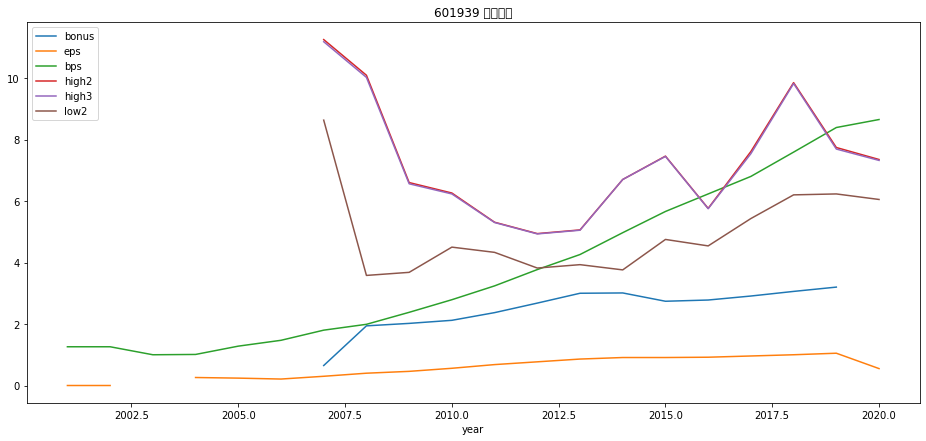

In [26]:
#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

ax = df_map.plot(figsize = (16, 7))
ax.set_title(stock_code +' ' + stock_name, fontsize=12, position=(0.5,1.05))
if is_saveImage :
    plt.savefig("../JN_DataWarehouse/stock_analysis/result/"+stock_code+'_'+stock_name+".png")#保存图片
plt.show()

# 6、数据列表显示(并把结果保存到excel）

In [27]:
df_result['high3/bps'] = (df_result['high3']/df_result['bps']).values.astype(float).round(2)
df_result['low3/bps'] = (df_result['low3']/df_result['bps']).values.astype(float).round(2)
df_result['bonus/low3'] = (df_result['bonus']*10/df_result['low3']).values.astype(float).round(2)
df_result['差'] = df_result['high3/bps'] - df_result['low3/bps']
df_result.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
bonus,NaN,NaN,NaN,NaN,NaN,NaN,0.65,1.94,2.02,2.12,2.37,2.68,3,3.01,2.74,2.78,2.91,3.06,3.2,NaN
pe,NaN,NaN,NaN,NaN,NaN,NaN,4.84,1.95,3.19,2.51,2.59,2.77,2.65,4.65,4.17,4.15,6.12,5.3,6.28,5.56
eps,0,0,NaN,0.26,0.24,0.21,0.3,0.4,0.46,0.56,0.68,0.77,0.86,0.91,0.91,0.92,0.96,1,1.05,0.55
roe,0,0,0,22.99,21.75,15,19.5,20.68,20.87,22.61,22.51,21.98,21.23,19.74,17.27,15.44,14.8,14.04,13.18,6.33
bps,1.26,1.26,1,1.01,1.28,1.47,1.8,1.99,2.38,2.79,3.24,3.77,4.26,4.97,5.66,6.23,6.8,7.59,8.39,8.65
high0,NaN,NaN,NaN,NaN,NaN,NaN,11.58,10.21,6.75,6.63,5.34,4.95,5.19,6.86,7.48,5.84,7.73,9.88,7.85,7.56
high1,NaN,NaN,NaN,NaN,NaN,NaN,11.53,10.15,6.66,6.27,5.31,4.94,5.1,6.85,7.47,5.78,7.69,9.85,7.76,7.39
high2,NaN,NaN,NaN,NaN,NaN,NaN,11.25,10.09,6.6,6.26,5.31,4.94,5.06,6.7,7.46,5.76,7.61,9.85,7.74,7.35
high3,NaN,NaN,NaN,NaN,NaN,NaN,11.18,10.02,6.56,6.23,5.3,4.93,5.05,6.7,7.45,5.75,7.54,9.82,7.69,7.32


In [28]:
df_result.style.\
                format('{:.2f}').\
                set_caption(stock_code+' - '+stock_name).\
                hide_index().bar('high3/bps',vmin=0).\
                hide_index().bar('high3',vmin=0, color='green').\
                highlight_min('low2',color='red').\
                highlight_max('high2',color='red').\
                background_gradient(subset=['bps'], cmap='BuGn').\
                background_gradient(subset=['roe'], cmap='Blues').\
                background_gradient(subset=['pe'], cmap='Purples').\
                background_gradient(subset=['eps'], cmap='Oranges').\
                highlight_null(null_color='gray')

year,bonus,pe,eps,roe,bps,high0,high1,high2,high3,mean,close,low0,low1,low2,low3,high3/bps,low3/bps,bonus/low3,差
2001.00,nan,nan,0.00,0.00,1.26,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2002.00,nan,nan,0.00,0.00,1.26,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2003.00,nan,nan,nan,0.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2004.00,nan,nan,0.26,22.99,1.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2005.00,nan,nan,0.24,21.75,1.28,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2006.00,nan,nan,0.21,15.00,1.47,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2007.00,0.65,4.84,0.30,19.50,1.80,11.58,11.53,11.25,11.18,10.00,8.53,8.43,8.50,8.63,9.20,6.21,5.11,0.71,1.10
2008.00,1.94,1.95,0.40,20.68,1.99,10.21,10.15,10.09,10.02,6.84,3.69,3.46,3.56,3.58,3.68,5.04,1.85,5.27,3.19
2009.00,2.02,3.19,0.46,20.87,2.38,6.75,6.66,6.60,6.56,5.21,3.68,3.67,3.67,3.68,3.68,2.76,1.55,5.49,1.21
2010.00,2.12,2.51,0.56,22.61,2.79,6.63,6.27,6.26,6.23,5.56,4.51,4.48,4.49,4.50,4.50,2.23,1.61,4.71,0.62


In [29]:
# !pip install XlsxWriter --user

In [30]:
import xlsxwriter

df_result.style.\
                format('{:.2f}').\
                set_caption(stock_code+' - '+stock_name).\
                hide_index().bar('high3/bps',vmin=0).\
                hide_index().bar('high3',vmin=0, color='green').\
                highlight_min('low2',color='red').\
                highlight_max('high2',color='red').\
                background_gradient(subset=['bps'], cmap='BuGn').\
                background_gradient(subset=['roe'], cmap='Blues').\
                background_gradient(subset=['pe'], cmap='Purples').\
                background_gradient(subset=['eps'], cmap='Oranges').\
                highlight_null(null_color='gray').\
                to_excel('../JN_DataWarehouse/stock_analysis/result/'+stock_code+'_'+stock_name+'.xlsx', engine='xlsxwriter')

In [31]:
print('finish:%.4f'%(time.time()-start))

finish:24.4134
